In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

dataset = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
gender = ['Male', 'Female']
income = ['Low', 'Mid', 'High']
n = 500
gender_data = []
income_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    
print(gender_data[:3], '\n')
print(income_data[:3])


height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

data = pd.DataFrame({
    'gender': gender_data,
    'economic status': income_data,
    'height': height,
    'weight': weight,
    'age': age,
    'income': income,
})

data.head()

['Male', 'Female', 'Male'] 

['Low', 'High', 'Mid']


,age,economic status,gender,height,income,weight
0,29.723504,Low,Male,88.717089,11497.379003,74.391669
1,42.357240,High,Female,181.470959,19586.298214,91.870420
2,33.069986,Mid,Male,125.726745,17250.743607,20.422320
3,27.367265,High,Male,156.224770,23477.737574,52.633519
4,28.770541,Mid,Male,167.705748,16272.475371,69.174973


# Data grouping

In [5]:
grouped_gender = data.groupby('gender')
print(grouped_gender.groups)

for names,groups in grouped_gender:
    print(names)
    print(groups)

{'Male': Int64Index([  0,   2,   3,   4,   6,   7,   9,  10,  11,  12,
            ...
            482, 483, 485, 487, 488, 491, 493, 494, 496, 497],
           dtype='int64', length=255), 'Female': Int64Index([  1,   5,   8,  13,  14,  15,  17,  21,  28,  30,
            ...
            478, 481, 484, 486, 489, 490, 492, 495, 498, 499],
           dtype='int64', length=245)}
Female
           age economic status  gender      height        income      weight
1    42.357240            High  Female  181.470959  19586.298214   91.870420
5    28.608223             Low  Female  101.312889   9681.596534   39.932110
8    27.923388             Mid  Female  136.953333  15818.049654   65.223189
13   25.369662             Low  Female  189.596343  21698.558244   92.115949
14   29.202396             Low  Female  164.829826  23029.776084   44.814891
15   28.819406             Mid  Female  176.434660  17688.175397   92.330829
17   33.363550            High  Female  177.472431  16325.547951   76.00931

In [13]:
grouped_gender.get_group('Female').head()

,age,economic status,gender,height,income,weight
1,42.357240,High,Female,181.470959,19586.298214,91.870420
5,28.608223,Low,Female,101.312889,9681.596534,39.932110
8,27.923388,Mid,Female,136.953333,15818.049654,65.223189
13,25.369662,Low,Female,189.596343,21698.558244,92.115949
14,29.202396,Low,Female,164.829826,23029.776084,44.814891


In [14]:
doubled_group = data.groupby(['gender', 'economic status'])
print(len(doubled_group))

for names,groups in doubled_group:
    print(names)
    print(groups)

6
('Female', 'High')
           age economic status  gender      height        income      weight
1    42.357240            High  Female  181.470959  19586.298214   91.870420
17   33.363550            High  Female  177.472431  16325.547951   76.009317
31   29.776040            High  Female  178.718903  13806.624811  138.657336
32   46.446742            High  Female  127.164958  15671.509818   82.059070
43   24.164959            High  Female  193.883355  16816.800268   41.952690
70   17.507742            High  Female  190.639286  15699.480177   35.379209
76   10.225904            High  Female  126.886954  17867.509286   47.451912
83   35.417635            High  Female  142.450511  16177.914805   66.058217
84   24.898250            High  Female  134.403721  14695.951443   64.032432
92   41.395300            High  Female  169.259958  16460.508242   75.907801
94   46.642345            High  Female  134.137503  15435.576365   99.118856
100  23.828269            High  Female  165.448955  214

In [20]:
doubled_group.sum()

age        height        income       weight
gender economic status                                                      
Female High             2116.535019  11505.339138  1.250964e+06  4735.489624
       Low              2449.640411  12436.503734  1.436378e+06  5687.252180
       Mid              3024.642268  15591.075680  1.713387e+06  5949.102679
Male   High             2488.683035  14531.498842  1.475811e+06  5913.476425
       Low              2682.894190  14433.459075  1.568230e+06  6067.811444
       Mid              2285.372196  12444.395302  1.359134e+06  5622.006069

In [21]:
doubled_group.size()

gender  economic status
Female  High               72
        Low                80
        Mid                96
Male    High               86
        Low                89
        Mid                77
dtype: int64

In [22]:
doubled_group.describe()

age                                              \
                       count       mean        std        min        25%   
gender economic status                                                     
Female High             72.0  29.396320  10.890946   8.901858  22.098048   
       Low              80.0  30.620505  13.140576  -7.283831  22.677426   
       Mid              96.0  31.506690  10.415150  11.386690  24.419470   
Male   High             86.0  28.938175  12.919161  -2.604494  20.508287   
       Low              89.0  30.144879  11.356105   7.407733  21.909736   
       Mid              77.0  29.680158  11.476355   1.801134  22.539184   

                                                        height              \
                              50%        75%        max  count        mean   
gender economic status                                                       
Female High             29.891896  36.779951  51.785109   72.0  159.796377   
       Low              30.334802  42.018239  55.191734   80.0  155.456297   
       Mid              29.968367  37.154339  61.872382   96.0  162.407038   
Male   High             27.468686  38.700520  75.190703   86.0  168.970917   
       Low              30.793717  38.364260  59.235035   89.0  162.173697   
       Mid              29.804243  37.782036  51.630697   77.0  161.615523   

                           ...            income               weight  \
                           ...               75%           max  count   
gender economic status     ...                                          
Female High                ...      19985.424931  27324.211088   72.0   
       Low                 ...      20517.500931  25951.678713   80.0   
       Mid                 ...      19831.684248  30149.021738   96.0   
Male   High                ...      19887.511900  24673.914877   86.0   
       Low                 ...      19616.252741  25828.416803   89.0   
       Mid                 ...      20528.850491  27412.720043   77.0   

                                                                               \
                             mean        std        min        25%        50%   
gender economic status                                                          
Female High             65.770689  23.829616  24.761458  45.281574  67.074107   
       Low              71.090652  23.929418  20.342595  57.557115  71.172266   
       Mid              61.969820  24.437426   6.141336  46.481599  62.054789   
Male   High             68.761354  27.028227  -9.498289  50.573397  66.593556   
       Low              68.177657  23.348174  14.652557  57.177601  68.185059   
       Mid              73.013066  26.915642  14.129195  53.158411  75.065003   

                                               
                              75%         max  
gender economic status                         
Female High             83.533985  123.700174  
       Low              82.837738  147.025084  
       Mid              78.896720  121.620318  
Male   High             91.091998  135.227662  
       Low              83.050533  117.655994  
       Mid              90.616941  122.622468  

[6 rows x 32 columns]

In [8]:
grouped_income = doubled_group['income']
grouped_income.describe()

count          mean          std           min  \
gender economic status                                                   
Female High              76.0  18174.938477  3199.275551  11414.919786   
       Low               85.0  18594.568145  3775.637646   9681.596534   
       Mid               84.0  17380.474013  3518.735580   8572.236963   
Male   High              82.0  17804.214163  3511.657255   9858.911703   
       Low               76.0  18149.337469  3176.418451   9826.323840   
       Mid               97.0  17956.500029  3176.090713   9621.758917   

                                 25%           50%           75%           max  
gender economic status                                                          
Female High             15659.481241  18177.707242  20307.696700  25137.418418  
       Low              15403.861859  19032.982330  20990.485027  25964.273733  
       Mid              14747.182952  17825.185209  19614.283314  26708.424158  
Male   High             15334.969918  17997.071184  19931.691137  24319.708221  
       Low              16081.004823  18220.503990  20334.850711  27131.844104  
       Mid              15349.793771  18265.451117  19897.976137  26798.624156

# Data aggregation

In [10]:
doubled_group.aggregate({
    'income': np.sum,
    'age': np.mean,
    'height': np.std,
})

height        income        age
gender economic status                                    
Female High             29.527581  1.381295e+06  26.549183
       Low              31.542237  1.580538e+06  28.738765
       Mid              29.587963  1.459960e+06  29.138737
Male   High             28.678550  1.459946e+06  29.005438
       Low              27.926016  1.379350e+06  28.704373
       Mid              29.421570  1.741781e+06  32.074951

In [26]:
doubled_group.aggregate({
    'age': np.mean,
    'height': lambda x:np.mean(x)/np.std(x)
})

age    height
gender economic status                     
Female High             29.396320  5.322726
       Low              30.620505  5.945458
       Mid              31.506690  5.028931
Male   High             28.938175  5.789551
       Low              30.144879  5.622760
       Mid              29.680158  5.297937

In [27]:
doubled_group.aggregate([ np.sum, np.mean, np.std ])

age                              height  \
                                sum       mean        std           sum   
gender economic status                                                    
Female High             2116.535019  29.396320  10.890946  11505.339138   
       Low              2449.640411  30.620505  13.140576  12436.503734   
       Mid              3024.642268  31.506690  10.415150  15591.075680   
Male   High             2488.683035  28.938175  12.919161  14531.498842   
       Low              2682.894190  30.144879  11.356105  14433.459075   
       Mid              2285.372196  29.680158  11.476355  12444.395302   

                                                     income                \
                              mean        std           sum          mean   
gender economic status                                                      
Female High             159.796377  30.232209  1.250964e+06  17374.503038   
       Low              155.456297  26.312036  1.436378e+06  17954.730099   
       Mid              162.407038  32.464074  1.713387e+06  17847.782433   
Male   High             168.970917  29.356671  1.475811e+06  17160.589361   
       Low              162.173697  29.005780  1.568230e+06  17620.563143   
       Mid              161.615523  30.705405  1.359134e+06  17651.096940   

                                          weight                        
                                std          sum       mean        std  
gender economic status                                                  
Female High             3603.131525  4735.489624  65.770689  23.829616  
       Low              3571.052757  5687.252180  71.090652  23.929418  
       Mid              3346.425475  5949.102679  61.969820  24.437426  
Male   High             3893.436401  5913.476425  68.761354  27.028227  
       Low              3529.412966  6067.811444  68.177657  23.348174  
       Mid              3794.987330  5622.006069  73.013066  26.915642

# Data filtering

In [15]:
# elements where age.sum is greater than (in the group)
doubled_group['age'].filter(lambda x: x.sum()>3000).head()

2     33.069986
4     28.770541
11    52.346786
12    36.783062
19    36.014071
Name: age, dtype: float64

# Variable transformation

(array([  7.,  17.,  50., 113., 118., 109.,  58.,  23.,   4.,   1.]),
 array([-2.98097962, -2.32325587, -1.66553211, -1.00780836, -0.35008461,
         0.30763915,  0.9653629 ,  1.62308666,  2.28081041,  2.93853417,
         3.59625792]),
 <a list of 10 Patch objects>)

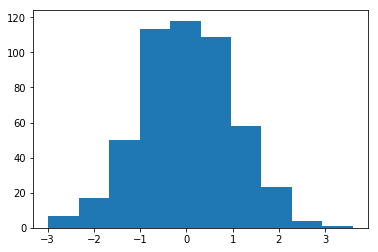

In [16]:
zscore = lambda x: (x - x.mean())/x.std()
zgroup = doubled_group.transform(zscore)
plt.hist(zgroup['age'])

In [18]:
fill_na_mean = lambda x: x.fillna(x.mean())
doubled_group.transform(fill_na_mean).head()

,age,height,income,weight
0,29.723504,88.717089,11497.379003,74.391669
1,42.357240,181.470959,19586.298214,91.870420
2,33.069986,125.726745,17250.743607,20.422320
3,27.367265,156.224770,23477.737574,52.633519
4,28.770541,167.705748,16272.475371,69.174973


# Useful operations

In [50]:
doubled_group.head(1)

,age,economic status,gender,height,income,weight
0,23.726669,High,Male,181.529149,17813.798315,-9.498289
1,8.694124,Low,Male,192.515258,19018.492321,69.236397
4,17.465796,Low,Female,209.376921,16631.952747,88.320046
5,10.395160,Mid,Male,174.931058,22763.543245,50.127018
6,21.271941,Mid,Female,128.278311,17468.063412,61.373068
21,19.499767,High,Female,127.202795,22969.973145,86.622323


In [51]:
doubled_group.tail(1)

,age,economic status,gender,height,income,weight
484,42.846620,High,Female,197.009091,11491.547960,83.521945
491,28.934343,Low,Female,134.234589,15928.849769,69.304807
493,21.149264,High,Male,155.689988,16318.746116,48.113441
496,40.512484,Low,Male,157.636950,18433.025054,90.763968
497,8.212173,Mid,Male,186.481015,21196.537698,66.947181
499,17.863852,Mid,Female,144.596667,15256.354383,48.295776


In [52]:
doubled_group.nth(5)

age      height        income      weight
gender economic status                                                 
Female High             16.400804  158.868597  27324.211088   34.774133
       Low              45.026014  131.917256  16333.781674   60.770305
       Mid              29.244051  167.429064  24071.284257   67.298031
Male   High             29.721939  159.153246  21993.938941   54.963618
       Low              35.629802  124.008486  11660.310797  110.297608
       Mid              32.856811  159.945029  26008.534885   62.857689

In [53]:
doubled_group.nth(82)

age      height        income     weight
gender economic status                                                
Female Mid              33.995292  184.864036  18264.896961  95.722956
Male   High             16.655778  227.869696  13457.148455  89.039040
       Low              23.243533  164.035023  17927.261439  47.496628

In [19]:
data_sorted = data.sort_values(['age', 'income'])
data_sorted.head(10)

,age,economic status,gender,height,income,weight
340,-7.507289,Low,Male,161.072552,27131.844104,78.719727
499,-1.808210,Mid,Female,108.899882,19080.735459,38.744764
164,-0.968159,Low,Female,136.783515,18754.328282,37.322504
278,-0.805272,Low,Female,192.293307,15403.861859,36.369256
112,-0.276513,Mid,Female,141.525420,16924.931046,80.919648
116,0.339043,Mid,Male,164.821955,18665.036125,44.471898
384,1.145447,High,Female,181.192871,21870.493461,106.062434
196,1.917001,High,Female,124.551266,13583.150870,83.243198
246,2.619208,High,Female,145.394723,15803.135115,89.389180
146,2.722737,Low,Female,139.285281,15172.264951,63.646894


In [57]:
age_grouped = data_sorted.groupby('gender')
age_grouped.head()

,age,economic status,gender,height,income,weight
345,-7.283831,Low,Female,147.225523,23700.880898,89.829082
111,-2.604494,High,Male,153.526453,15343.424800,104.556154
271,-2.559048,Low,Female,162.974760,23026.720407,71.657146
127,1.801134,Mid,Male,122.612231,17594.755121,90.202064
84,5.179102,High,Male,225.603438,18939.882042,121.244502
195,5.812963,Mid,Male,198.191286,14651.719870,65.988579
130,5.819398,High,Male,206.408793,14747.905454,66.365944
414,6.833660,Low,Female,175.044435,14091.979770,50.878487
160,7.326132,Low,Female,178.314585,14192.265337,21.586049
352,8.901858,High,Female,170.033771,20541.451784,44.630463


In [59]:
age_grouped.tail(1)

,age,economic status,gender,height,income,weight
433,61.872382,Mid,Female,194.588184,21371.156166,95.473944
258,75.190703,High,Male,100.566904,20917.603726,102.075974


# Testing/Training data sets

In [20]:
# Training 80%
# Testing 20%
len(dataset)

3333

## Normal distribution

(array([  6.,  22., 152., 518., 923., 931., 554., 180.,  45.,   2.]),
 array([-3.91377622, -3.13792823, -2.36208024, -1.58623224, -0.81038425,
        -0.03453625,  0.74131174,  1.51715974,  2.29300773,  3.06885573,
         3.84470372]),
 <a list of 10 Patch objects>)

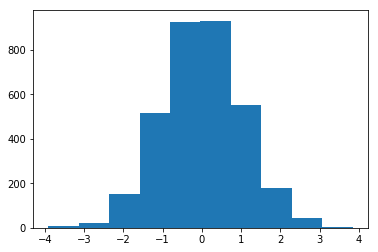

In [22]:
a = np.random.randn(len(dataset))
plt.hist(a)

[ True  True False ... False  True  True]


(array([ 731.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2602.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

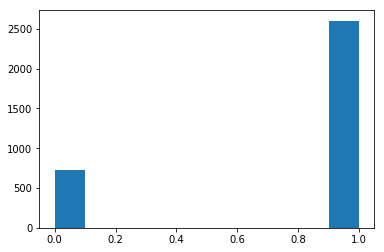

In [23]:
check = (a < 0.8)
print(check)
plt.hist(check)

In [29]:
training  = dataset[check]
testing = dataset[~check]
print(len(training), len(testing))

2602 731


## sklearn

In [25]:
from sklearn.model_selection import train_test_split
tran, test = train_test_split(dataset, test_size = 0.2)
print(len(tran), len(test))

2666 667


## shuffle

In [28]:
dataset = sklearn.utils.shuffle(dataset)
cut_id = int(0.75*len(dataset))
train_data = dataset[:cut_id]
test_data = dataset[cut_id + 1:]
print(len(train_data), len(test_data))

2499 833
